# Data visualization for the BP addresses

See below for a Sankey chart showing the flow of transactions from the BP addresses.

In [1]:
from os import listdir
from os.path import isfile, join

import pandas as pd
import altair as alt

In [2]:
pd.set_option('display.max_rows', 50)

In [3]:
data_directory = '../jsonl/producerpay'
df = pd.DataFrame()
for data_file in [join(data_directory, f) for f in listdir(data_directory) if isfile(join(data_directory, f))]:
    df = pd.concat([df, pd.read_json(data_file, lines=True)])

In [4]:
df = pd.merge(df, pd.DataFrame({'total_EOS' : df[df.token == 'EOS'].groupby('account')['amount'].sum()}), on='account').reset_index()
df['amount_ratio'] = df['amount']/df['total_EOS']

In [5]:
df

,index,account,date,timestamp,amount,token,from,to,block_num,transaction_id,memo,contract,action,total_EOS,amount_ratio
0,0,eosio.bpay,2022-10-21 00:03:31,2022-10-21 00:03:31,344.5222,EOS,eosio.bpay,newdex.bp,274268407,353555074901da28cd6dd64b0b64e73f12fdc86a91c8ad...,producer block pay,eosio.token,transfer,26568.7717,0.012967
1,1,eosio.bpay,2022-10-21 00:03:49,2022-10-21 00:03:49,344.5222,EOS,eosio.bpay,aus1genereos,274268443,504ff8fadb162c2cde9777c0ee8cd69301a97579ce1e15...,producer block pay,eosio.token,transfer,26568.7717,0.012967
2,2,eosio.bpay,2022-10-21 00:27:31,2022-10-21 00:27:31,344.0244,EOS,eosio.bpay,starteosiobp,274271284,1a5719345a8777b36ce6b016159cd7f2e8ed4f358f1db7...,producer block pay,eosio.token,transfer,26568.7717,0.012948
3,3,eosio.bpay,2022-10-21 01:23:42,2022-10-21 01:23:42,343.9339,EOS,eosio.bpay,eosflytomars,274278026,0439ccdbaac893021ee1bd6e28ed89bcbc85ad09b69234...,producer block pay,eosio.token,transfer,26568.7717,0.012945
4,4,eosio.bpay,2022-10-21 01:40:55,2022-10-21 01:40:55,344.5178,EOS,eosio.bpay,eoslaomaocom,274280092,ef6b1486a94b26d025219652ad98bf2d10e7551a9628af...,producer block pay,eosio.token,transfer,26568.7717,0.012967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,291,eosio.vpay,2022-10-24 15:50:25,2022-10-24 15:50:25,566.0570,EOS,eosio.vpay,okcapitalbp1,274900115,a7ef98e842892565a4305bfc7aa40dd48a6f47f325a569...,producer vote pay,eosio.token,transfer,78343.1876,0.007225
292,292,eosio.vpay,2022-10-24 16:45:09,2022-10-24 16:45:09,211.9034,EOS,eosio.vpay,eoshenzhenio,274906683,d39f2851e61f83a15564dfa6cba7c94473087d747aa851...,producer vote pay,eosio.token,transfer,78343.1876,0.002705
293,293,eosio.vpay,2022-10-24 17:11:33,2022-10-24 17:11:33,174.1711,EOS,eosio.vpay,eosathenabp1,274909849,43c398dd43e7053575dca7d954f1a33bcc5b71819b3ad2...,producer vote pay,eosio.token,transfer,78343.1876,0.002223
294,294,eosio.vpay,2022-10-24 17:38:06,2022-10-24 17:38:06,574.0441,EOS,eosio.vpay,atticlabeosb,274913035,c28da80692898b9afea5abc1d12891fa35f4243c4b47ae...,producer vote pay,eosio.token,transfer,78343.1876,0.007327


In [6]:
from pysankey import sankey
import seaborn as sns

In [7]:
left_colors = {'eosio.bpay': '#3d3d3d', 'eosio.vpay': '#9a9a9a'}
right_colors = {}
palette = (c for c in sns.color_palette('husl', df['to'].nunique()))

for dest in df['to'].unique():
    right_colors[dest] = next(palette)

 The following arguments are deprecated and should be removed: figSize in sankey()


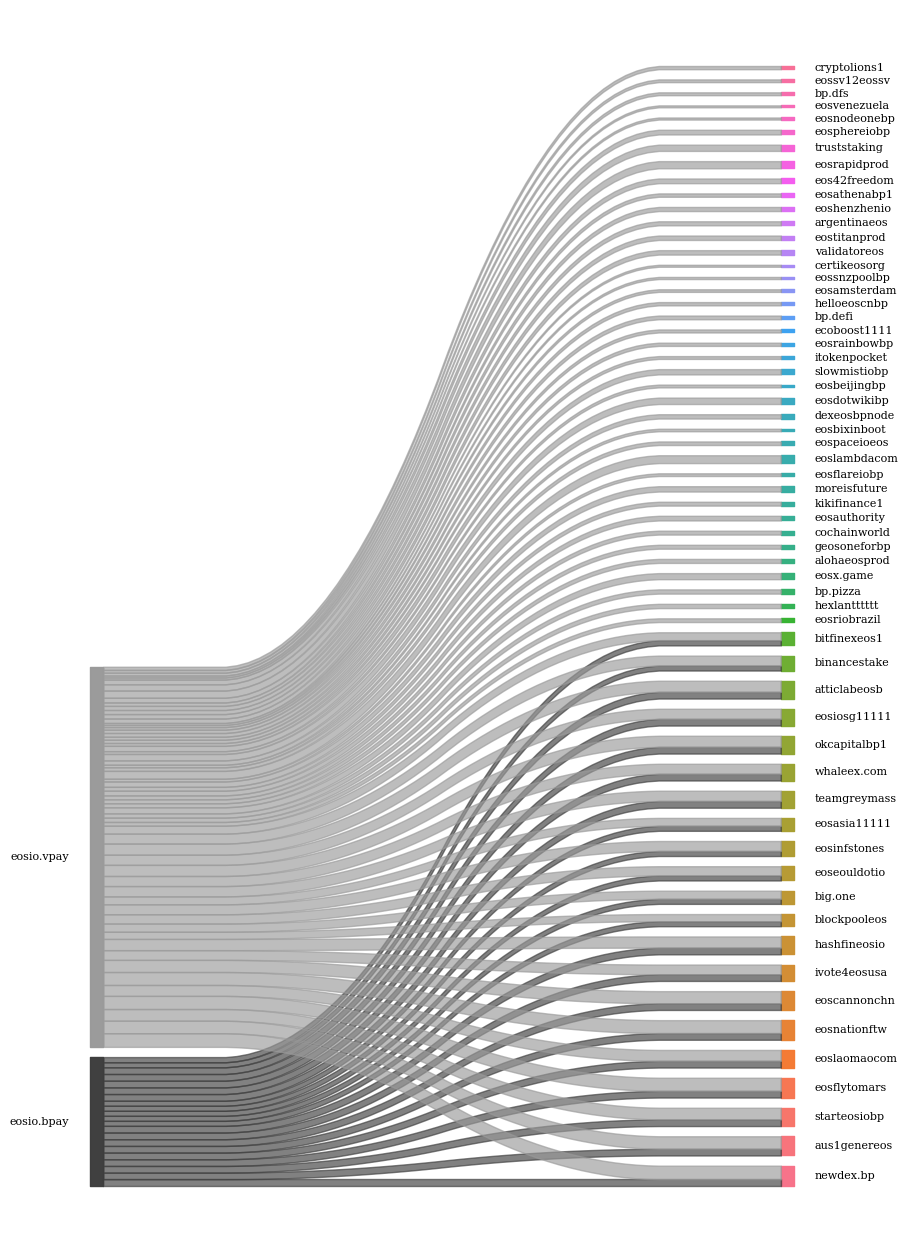

In [8]:
weight = df['amount'].astype(float)
ax = sankey(
    left=df['from'],
    right=df['to'],
    rightWeight=weight,
    leftWeight=weight,
    aspect=2,
    fontsize=8,
    figSize=(10, 16),
    colorDict=left_colors | right_colors
)